In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('heartdiseases.csv')

In [4]:
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [5]:
data = pd.get_dummies(data, columns=['Gender','Education','Smoker'], drop_first = True)
data

,Age,Income,Cholesterol,Heart_Disease,Gender_Male,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College,Smoker_Yes
0,42,65000,180,No,0,0,0,0,0,0
1,55,40000,245,Yes,1,0,1,0,0,1
2,30,80000,210,No,0,0,0,1,0,1
3,39,50000,195,No,1,0,0,0,1,1
4,27,30000,170,No,1,0,0,0,1,0
5,46,90000,200,Yes,0,1,0,0,0,0
6,35,55000,190,No,1,0,0,0,1,0
7,48,42000,225,Yes,0,0,1,0,0,1
8,29,70000,185,No,1,0,0,0,0,1
9,54,48000,235,Yes,0,0,0,0,1,0


In [6]:
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = log_reg.predict(X_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

In [9]:
accuracy_score(y_test,y_pred)

0.8

In [10]:
y_pred_proba =  log_reg.predict_proba(X_test)[:,1]

In [11]:
y_pred_proba

array([0.38911571, 0.06104041, 0.92159091, 0.61553071, 0.41945066,
       0.15319053, 0.15319053, 0.87867665, 0.28932309, 0.3485628 ,
       0.56301372, 0.29813394, 0.41077551, 0.07373902, 0.61433634])

In [14]:
y_test = y_test.map({'Yes':1,'No':0})

In [15]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

In [21]:
print(thresholds)
print()
print(fpr)
print()
print(tpr)
print()
print(auc)

[       inf 0.92159091 0.61553071 0.61433634 0.41077551 0.28932309
 0.15319053 0.06104041]

[0.         0.         0.         0.11111111 0.11111111 0.55555556
 0.77777778 1.        ]

[0.         0.16666667 0.5        0.5        1.         1.
 1.         1.        ]

0.9444444444444444


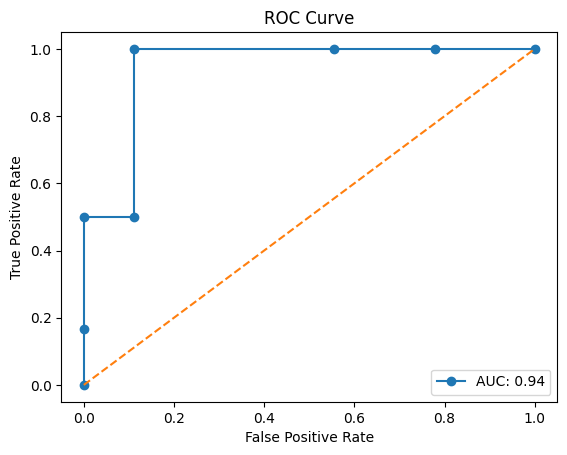

In [22]:
plt.plot(fpr,tpr, label=f'AUC: {auc:.2f}', marker='o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()
         

In [14]:
odds_ratios = np.exp(log_reg.coef_)

In [15]:
odds_ratios

array([[1.29464878, 0.99995948, 0.96193784, 1.00025609, 1.00623414,
        1.00653056, 0.99873351, 0.99144764, 1.00349526]])